In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [12]:
enrollment = pd.read_csv("~/Desktop/chia2018/2017/datasheets/enrollment_by_payer.csv")
#Reading the dataset in a dataframe using Pandas
enrollment

,Funding Type,Payer,months_2014,months_2015,months_2016
0,Fully-Insured,Aetna,117562,176453,187252
1,Fully-Insured,BCBSMA,10303490,10219240,10185021
2,Fully-Insured,Cigna,82415,78735,95322
3,Fully-Insured,Fallon,1305244,1188821,1019486
4,Fully-Insured,HPHC,3777852,3763769,3637995
5,Fully-Insured,HNE,1006752,1026295,1014581
6,Fully-Insured,NHP,968080,1415675,1746312
7,Fully-Insured,Tufts,2938879,3295984,3642532
8,Fully-Insured,UniCare,37539,33132,29087
9,Fully-Insured,United,194463,250277,325303


In [13]:
months = enrollment[enrollment.columns[1:5]]
mth_cols = ['months_2014','months_2015','months_2016']
months

,Payer,months_2014,months_2015,months_2016
0,Aetna,117562,176453,187252
1,BCBSMA,10303490,10219240,10185021
2,Cigna,82415,78735,95322
3,Fallon,1305244,1188821,1019486
4,HPHC,3777852,3763769,3637995
5,HNE,1006752,1026295,1014581
6,NHP,968080,1415675,1746312
7,Tufts,2938879,3295984,3642532
8,UniCare,37539,33132,29087
9,United,194463,250277,325303


In [14]:
premiums = pd.read_csv("~/Desktop/chia2018/2017/datasheets/premiums_by_payer.csv")
pre_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016', 'pmpm_2014','pmpm_2015','pmpm_2016']

premiums = premiums.replace({'\$': '', ',': ''}, regex=True)
premiums[pre_cols] = premiums[pre_cols].apply(pd.to_numeric)


agg_premiums = premiums[premiums.columns[1:5]]
agg_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016']


In [16]:
pmpm = pd.DataFrame(columns = ['Payer','pmpm_2014','pmpm_2015','pmpm_2016'])
pmpm['Payer'] = enrollment['Payer']
pmpm['pmpm_2014'] = agg_premiums['agg_premiums_2014']/months['months_2014']
pmpm['pmpm_2015'] = agg_premiums['agg_premiums_2015']/months['months_2015']
pmpm['pmpm_2016'] = agg_premiums['agg_premiums_2016']/months['months_2016']

pmpm
# pmpm.drop(9)

,Payer,pmpm_2014,pmpm_2015,pmpm_2016
0,Aetna,426.979091,414.717846,418.950089
1,BCBSMA,444.393663,464.434551,478.779586
2,Cigna,345.141747,415.081212,420.401101
3,Fallon,455.915820,483.551592,536.307473
4,HPHC,456.984258,456.158675,476.958886
5,HNE,389.713307,405.560618,423.748462
6,NHP,380.955677,383.339247,401.480721
7,Tufts,461.801262,443.069275,431.267687
8,UniCare,890.041064,906.270500,938.821948
9,United,NaN,NaN,NaN


In [6]:
cols = ['pmpm_2014','pmpm_2015','pmpm_2016']
loop_pmpm = pd.DataFrame(columns = ['Payer'] + cols)
for i in range(3):
    agg = agg_cols[i]
    mth = mth_cols[i]
    loop_pmpm[cols[i]] = agg_premiums[agg]/months[mth]
loop_pmpm['Payer'] = enrollment['Payer']

loop_pmpm.drop(9)

,Payer,pmpm_2014,pmpm_2015,pmpm_2016
0,Aetna,426.979091,414.717846,418.950089
1,BCBSMA,444.393663,464.434551,478.779586
2,Cigna,345.141747,415.081212,420.401101
3,Fallon,455.915820,483.551592,536.307473
4,HPHC,456.984258,456.158675,476.958886
5,HNE,389.713307,405.560618,423.748462
6,NHP,380.955677,383.339247,401.480721
7,Tufts,461.801262,443.069275,431.267687
8,UniCare,890.041064,906.270500,938.821948
10,Total,440.408801,447.261933,457.256149


In [7]:
loop_pmpm['pmpm_2016']

0     418.950089
1     478.779586
2     420.401101
3     536.307473
4     476.958886
5     423.748462
6     401.480721
7     431.267687
8     938.821948
9            NaN
10    457.256149
Name: pmpm_2016, dtype: float64

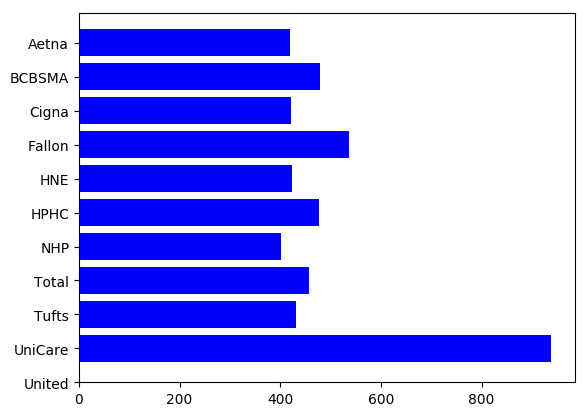

In [8]:


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(loop_pmpm['Payer'], loop_pmpm['pmpm_2016'], align='center',
        color='blue')
ax.set_yticks(loop_pmpm['Payer'])

ax.set_yticklabels(loop_pmpm['Payer'])
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()